In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load weather_data.csv
weather_data_path = '/content/drive/MyDrive/weather_data.csv'  # Update the path accordingly
weather_data = pd.read_csv(weather_data_path)

In [ ]:
weather_data

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1,1980-01-01T01:00:00Z,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
2,1980-01-01T02:00:00Z,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
3,1980-01-01T03:00:00Z,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
4,1980-01-01T04:00:00Z,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350635,2019-12-31T19:00:00Z,-1.386,0.0,0.0,1.684,0.0,0.0,-1.351,0.0,0.0,...,0.0,-0.382,0.0,0.0,0.053,0.0,0.0,-0.766,0.0,0.0
350636,2019-12-31T20:00:00Z,-1.661,0.0,0.0,1.718,0.0,0.0,-1.009,0.0,0.0,...,0.0,-0.418,0.0,0.0,-0.207,0.0,0.0,-0.742,0.0,0.0
350637,2019-12-31T21:00:00Z,-1.986,0.0,0.0,1.726,0.0,0.0,-0.986,0.0,0.0,...,0.0,-0.490,0.0,0.0,-0.203,0.0,0.0,-0.764,0.0,0.0
350638,2019-12-31T22:00:00Z,-2.184,0.0,0.0,1.569,0.0,0.0,-1.270,0.0,0.0,...,0.0,-0.434,0.0,0.0,-0.032,0.0,0.0,-0.867,0.0,0.0


In [ ]:
# Load time_series_60min_singleindex.csv
time_series_path = '/content/drive/MyDrive/time_series_60min_singleindex.csv'  # Update the path accordingly
time_series_data = pd.read_csv(time_series_path)

In [ ]:
# Convert the date and time column to datetime format
weather_data['utc_timestamp'] = pd.to_datetime(weather_data['utc_timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

# Filter the data based on the specified date range
start_date = '2015-01-01 00:00:00'
end_date = '2019-12-31 23:00:00'
filtered_weather_data = weather_data[
    (weather_data['utc_timestamp'] >= start_date) & (weather_data['utc_timestamp'] <= end_date)
]

# Select the required columns
selected_filtered_weather_data = filtered_weather_data[['utc_timestamp', 'ES_temperature', 'ES_radiation_direct_horizontal', 'ES_radiation_diffuse_horizontal']]


In [ ]:
selected_filtered_weather_data

,utc_timestamp,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal
306816,2015-01-01 00:00:00,3.438,0.0,0.0
306817,2015-01-01 01:00:00,3.217,0.0,0.0
306818,2015-01-01 02:00:00,3.103,0.0,0.0
306819,2015-01-01 03:00:00,3.051,0.0,0.0
306820,2015-01-01 04:00:00,2.982,0.0,0.0
...,...,...,...,...
350635,2019-12-31 19:00:00,8.295,0.0,0.0
350636,2019-12-31 20:00:00,7.805,0.0,0.0
350637,2019-12-31 21:00:00,7.342,0.0,0.0
350638,2019-12-31 22:00:00,6.959,0.0,0.0


In [ ]:
selected_filtered_weather_data.isnull().sum()

utc_timestamp                      0
ES_temperature                     0
ES_radiation_direct_horizontal     0
ES_radiation_diffuse_horizontal    0
dtype: int64

In [ ]:
time_series_data

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


In [ ]:
# Convert the date and time column to datetime format
time_series_data['utc_timestamp'] = pd.to_datetime(time_series_data['utc_timestamp'], format='%Y-%m-%dT%H:%M:%SZ')

# Filter the data based on the specified date range
start_date = '2015-01-01 00:00:00'
end_date = '2019-12-31 23:00:00'
filtered_time_series_data = time_series_data[
    (time_series_data['utc_timestamp'] >= start_date) & (time_series_data['utc_timestamp'] <= end_date)
]

# Select the required columns
selected_filtered_time_series_data = filtered_time_series_data[['utc_timestamp', 'ES_solar_generation_actual']]


In [ ]:
selected_filtered_time_series_data

,utc_timestamp,ES_solar_generation_actual
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,50.0
3,2015-01-01 02:00:00,50.0
4,2015-01-01 03:00:00,42.0
5,2015-01-01 04:00:00,34.0
...,...,...
43820,2019-12-31 19:00:00,15.0
43821,2019-12-31 20:00:00,15.0
43822,2019-12-31 21:00:00,15.0
43823,2019-12-31 22:00:00,15.0


In [ ]:
# Create a copy of the DataFrame
selected_filtered_time_series_data_copy = selected_filtered_time_series_data.copy()

# Fill NaN values in 'ES_solar_generation_actual' column with the next non-NaN value
selected_filtered_time_series_data_copy['ES_solar_generation_actual'].fillna(method='ffill', inplace=True)

In [ ]:

selected_filtered_time_series_data_copy.isnull().sum()

utc_timestamp                 0
ES_solar_generation_actual    1
dtype: int64

In [ ]:
# Set a specific value (e.g., 50) for the NaN value in the second column of the first row
selected_filtered_time_series_data_copy.loc[1, 'ES_solar_generation_actual'] = 50


In [ ]:
selected_filtered_time_series_data_copy



,utc_timestamp,ES_solar_generation_actual
1,2015-01-01 00:00:00,50.0
2,2015-01-01 01:00:00,50.0
3,2015-01-01 02:00:00,50.0
4,2015-01-01 03:00:00,42.0
5,2015-01-01 04:00:00,34.0
...,...,...
43820,2019-12-31 19:00:00,15.0
43821,2019-12-31 20:00:00,15.0
43822,2019-12-31 21:00:00,15.0
43823,2019-12-31 22:00:00,15.0


In [ ]:
row_number = 35061
next_20_values = selected_filtered_time_series_data_copy.iloc[row_number:row_number+20]

print("Next 20 values from row 35061 in your DataFrame:")
print(next_20_values)


Next 20 values from row 35061 in your DataFrame:
            utc_timestamp  ES_solar_generation_actual
35062 2018-12-31 21:00:00                        31.0
35063 2018-12-31 22:00:00                        31.0
35064 2018-12-31 23:00:00                        31.0
35065 2019-01-01 00:00:00                        31.0
35066 2019-01-01 01:00:00                        23.0
35067 2019-01-01 02:00:00                        15.0
35068 2019-01-01 03:00:00                        15.0
35069 2019-01-01 04:00:00                        15.0
35070 2019-01-01 05:00:00                        15.0
35071 2019-01-01 06:00:00                        15.0
35072 2019-01-01 07:00:00                        39.0
35073 2019-01-01 08:00:00                       777.0
35074 2019-01-01 09:00:00                      2084.0
35075 2019-01-01 10:00:00                      3142.0
35076 2019-01-01 11:00:00                      3814.0
35077 2019-01-01 12:00:00                      3873.0
35078 2019-01-01 13:00:00        

In [ ]:
row_number = 35061
next_20_values = selected_filtered_time_series_data_copy.iloc[row_number:row_number+20]

print("Next 20 values from row 35061 in your DataFrame:")
print(next_20_values)


In [ ]:
selected_filtered_time_series_data_copy.describe()

,ES_solar_generation_actual
count,43824.000000
mean,1475.512835
std,1732.862858
min,0.000000
25%,69.000000
50%,623.000000
75%,2668.250000
max,6748.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the float columns
float_columns = selected_filtered_time_series_data_copy.select_dtypes(include='float64').columns

# Create a copy of the DataFrame
normalized_data = selected_filtered_time_series_data_copy.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the float columns
normalized_data[float_columns] = scaler.fit_transform(normalized_data[float_columns])


In [ ]:
normalized_data

,utc_timestamp,ES_solar_generation_actual
1,2015-01-01 00:00:00,-0.822644
2,2015-01-01 01:00:00,-0.822644
3,2015-01-01 02:00:00,-0.822644
4,2015-01-01 03:00:00,-0.827261
5,2015-01-01 04:00:00,-0.831877
...,...,...
43820,2019-12-31 19:00:00,-0.842842
43821,2019-12-31 20:00:00,-0.842842
43822,2019-12-31 21:00:00,-0.842842
43823,2019-12-31 22:00:00,-0.842842


In [ ]:
normalized_data.describe()

,ES_solar_generation_actual
count,4.382400e+04
mean,3.891253e-18
std,1.000011e+00
min,-8.514982e-01
25%,-8.116793e-01
50%,-4.919735e-01
75%,6.883123e-01
max,3.042680e+00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the float columns
float_columns_weather = selected_filtered_weather_data.select_dtypes(include='float64').columns

# Create a copy of the DataFrame
normalized_weather_data = selected_filtered_weather_data.copy()

# Initialize the StandardScaler
scaler_weather = StandardScaler()

# Normalize the float columns
normalized_weather_data[float_columns_weather] = scaler_weather.fit_transform(normalized_weather_data[float_columns_weather])


In [ ]:
normalized_weather_data

,utc_timestamp,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal
306816,2015-01-01 00:00:00,-1.699911,-0.642447,-0.795283
306817,2015-01-01 01:00:00,-1.730706,-0.642447,-0.795283
306818,2015-01-01 02:00:00,-1.746592,-0.642447,-0.795283
306819,2015-01-01 03:00:00,-1.753838,-0.642447,-0.795283
306820,2015-01-01 04:00:00,-1.763453,-0.642447,-0.795283
...,...,...,...,...
350635,2019-12-31 19:00:00,-1.023110,-0.642447,-0.795283
350636,2019-12-31 20:00:00,-1.091389,-0.642447,-0.795283
350637,2019-12-31 21:00:00,-1.155906,-0.642447,-0.795283
350638,2019-12-31 22:00:00,-1.209275,-0.642447,-0.795283


In [ ]:
normalized_weather_data.describe()

,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal
count,4.382400e+04,4.382400e+04,4.382400e+04
mean,3.320536e-16,-1.089551e-16,5.836879e-17
std,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.283490e+00,-6.424469e-01,-7.952831e-01
25%,-8.177143e-01,-6.424469e-01,-7.952831e-01
50%,-1.044044e-01,-6.316911e-01,-6.438811e-01
75%,7.168984e-01,3.916289e-01,6.204906e-01
max,2.733647e+00,3.423901e+00,4.521553e+00


In [ ]:
# Select features (X) and target variable (y)
X = selected_filtered_weather_data[['ES_temperature', 'ES_radiation_direct_horizontal', 'ES_radiation_diffuse_horizontal']]
y = selected_filtered_time_series_data_copy['ES_solar_generation_actual']

# Initialize the StandardScaler for features and target variable
scaler_X = StandardScaler()

# Normalize the features
X_scaled = scaler_X.fit_transform(X)

# Normalize the target variable
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
# Calculate the index to split the data
split_index = int(0.8 * len(X_scaled))

# Split the data into training and testing sets
X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y_scaled[:split_index]
y_test = y_scaled[split_index:]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test

array([[-0.83245439],
       [-0.83360856],
       [-0.83360856],
       ...,
       [-0.84284194],
       [-0.84284194],
       [-0.84284194]])

In [ ]:
y_test_original_scale = scaler_y.inverse_transform(y_test)
y_test_original_scale

array([[  50.],
       [  27.],
       [3127.],
       ...,
       [2629.],
       [ 354.],
       [ 334.]])

In [ ]:

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions to get the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)

y_test_original_scale = scaler_y.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.1366046859972472


Mean Squared Error: 0.1366046859972472
R-squared: 0.8887746486500733


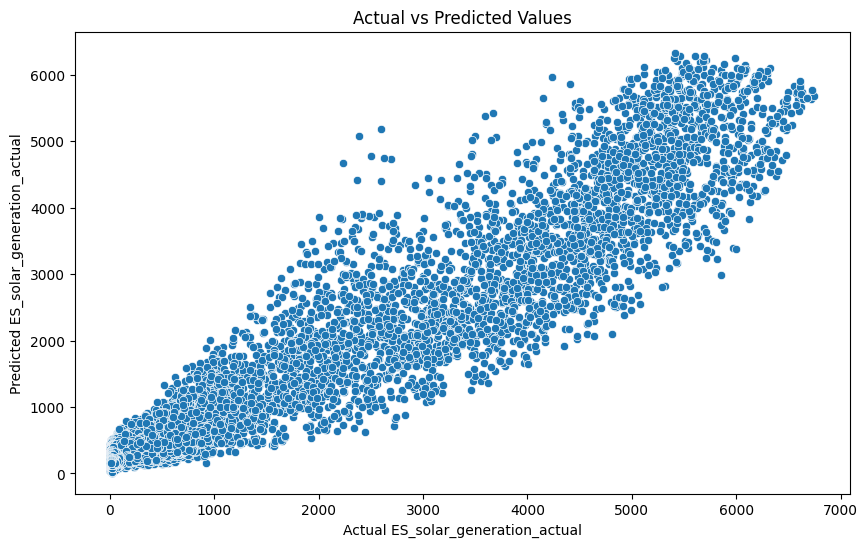

In [ ]:
# Performance Metrics
mse = mean_squared_error(y_test, y_pred_scaled)
r_squared = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale.flatten(), y=y_pred.flatten())
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual ES_solar_generation_actual')
plt.ylabel('Predicted ES_solar_generation_actual')
plt.show()


In [ ]:
# Model: Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Training Block
rf_model.fit(X_train, y_train.ravel())

# Prediction Block
y_pred_scaled_rf = rf_model.predict(X_test)
y_pred_rf = scaler_y.inverse_transform(y_pred_scaled_rf.reshape(-1, 1))

Model: Random Forest
Mean Squared Error: 0.09974960677852594
R-squared: 0.9187825440982152


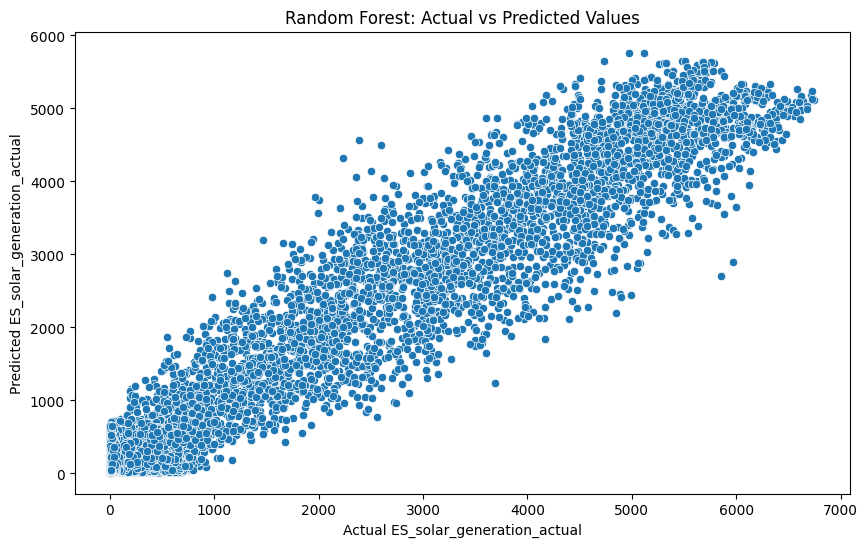

In [ ]:
# Visualization Block for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_scaled_rf)
r_squared_rf = r2_score(y_test, y_pred_scaled_rf)

print(f'Model: Random Forest')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r_squared_rf}')

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale.flatten(), y=y_pred_rf.flatten())
plt.title('Random Forest: Actual vs Predicted Values')
plt.xlabel('Actual ES_solar_generation_actual')
plt.ylabel('Predicted ES_solar_generation_actual')
plt.show()

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)

# Training Block
dt_model.fit(X_train, y_train)

# Prediction Block
y_pred_scaled_dt = dt_model.predict(X_test)
y_pred_dt = scaler_y.inverse_transform(y_pred_scaled_dt.reshape(-1, 1))

Decision Tree Model:
Mean Squared Error: 0.14476525531326553
R-squared: 0.8821302046270633


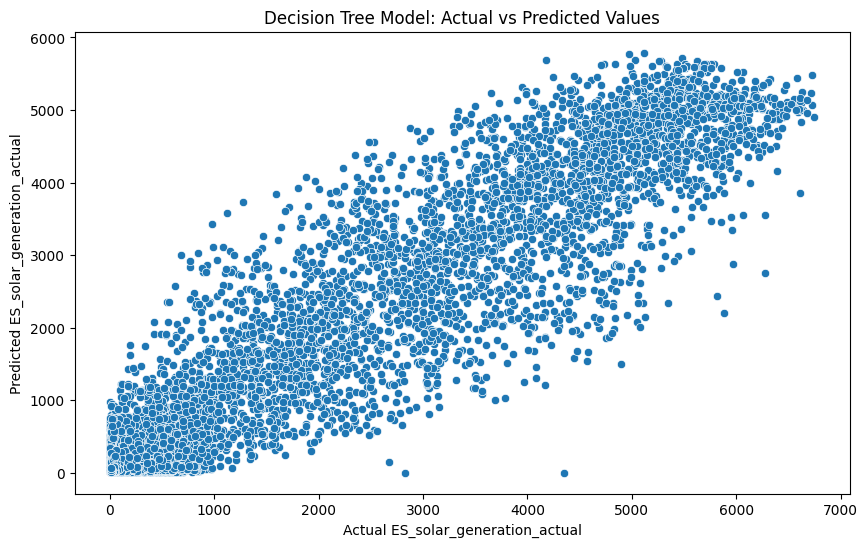

In [ ]:
# Visualization Block
mse_dt = mean_squared_error(y_test, y_pred_scaled_dt)
r_squared_dt = r2_score(y_test, y_pred_scaled_dt)

print(f'Decision Tree Model:')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r_squared_dt}')

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale.flatten(), y=y_pred_dt.flatten())
plt.title('Decision Tree Model: Actual vs Predicted Values')
plt.xlabel('Actual ES_solar_generation_actual')
plt.ylabel('Predicted ES_solar_generation_actual')
plt.show()

In [ ]:
# XGBoost Model
xgb_model = XGBRegressor(random_state=42)

# Training Block
xgb_model.fit(X_train, y_train)

# Prediction Block
y_pred_scaled_xgb = xgb_model.predict(X_test)
y_pred_xgb = scaler_y.inverse_transform(y_pred_scaled_xgb.reshape(-1, 1))

In [ ]:
y_train

array([[-0.82264392],
       [-0.82264392],
       [-0.82264392],
       ...,
       [-0.08974433],
       [-0.69799328],
       [-0.8024459 ]])

XGBoost Model:
Mean Squared Error: 0.09741086981382607
R-squared: 0.9206867748258423


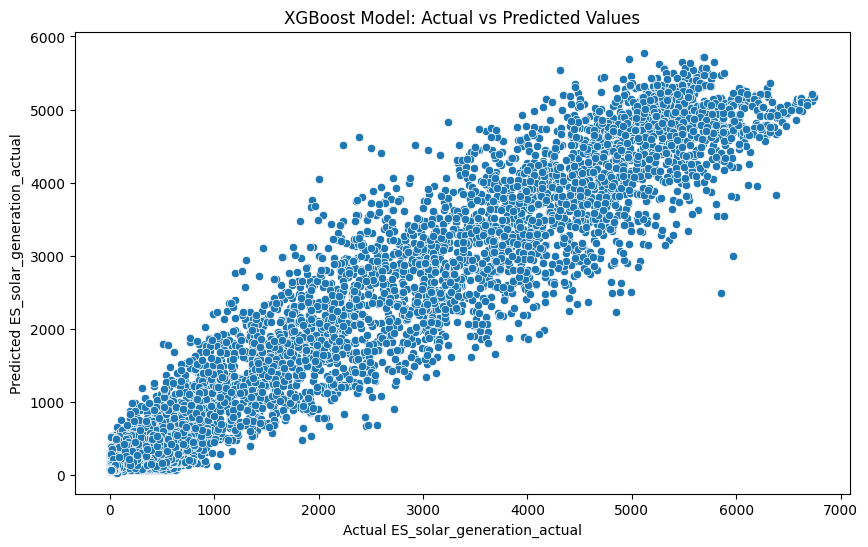

In [ ]:
# Visualization Block
mse_xgb = mean_squared_error(y_test, y_pred_scaled_xgb)
r_squared_xgb = r2_score(y_test, y_pred_scaled_xgb)

print(f'XGBoost Model:')
print(f'Mean Squared Error: {mse_xgb}')
print(f'R-squared: {r_squared_xgb}')

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale.flatten(), y=y_pred_xgb.flatten())
plt.title('XGBoost Model: Actual vs Predicted Values')
plt.xlabel('Actual ES_solar_generation_actual')
plt.ylabel('Predicted ES_solar_generation_actual')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.dates as mdates


In [ ]:
# Simple Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training Block
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Prediction Block
y_pred_scaled_nn = model.predict(X_test)
y_pred_nn = scaler_y.inverse_transform(y_pred_scaled_nn)

Epoch 1/50
877/877 [==============================] - 3s 2ms/step - loss: 0.0856 - val_loss: 0.0662
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0624 - val_loss: 0.0647
Epoch 3/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0614 - val_loss: 0.0670
Epoch 4/50
877/877 [==============================] - 3s 3ms/step - loss: 0.0606 - val_loss: 0.0651
Epoch 5/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0600 - val_loss: 0.0628
Epoch 6/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0595 - val_loss: 0.0615
Epoch 7/50
261/877 [=======>......................] - ETA: 1s - loss: 0.0599

KeyboardInterrupt: 

In [ ]:
# Simple Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training Block with Early Stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Prediction Block
y_pred_scaled_nn = model.predict(X_test)
y_pred_nn = scaler_y.inverse_transform(y_pred_scaled_nn)

Epoch 1/50
877/877 [==============================] - 3s 3ms/step - loss: 0.0762 - val_loss: 0.0672
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0624 - val_loss: 0.0644
Epoch 3/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0614 - val_loss: 0.0637
Epoch 4/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0604 - val_loss: 0.0695
Epoch 5/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0600 - val_loss: 0.0624
Epoch 6/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0592 - val_loss: 0.0614
Epoch 7/50
877/877 [==============================] - 3s 3ms/step - loss: 0.0588 - val_loss: 0.0609
Epoch 8/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0585 - val_loss: 0.0656
Epoch 9/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0579 - val_loss: 0.0650
Epoch 10/50
877/877 [==============================] - 2s 2ms/step - loss: 0.0577 - val_loss: 0.0614

Neural Network Model:
Mean Squared Error: 0.09195030801964944
R-squared: 0.9251328368309006


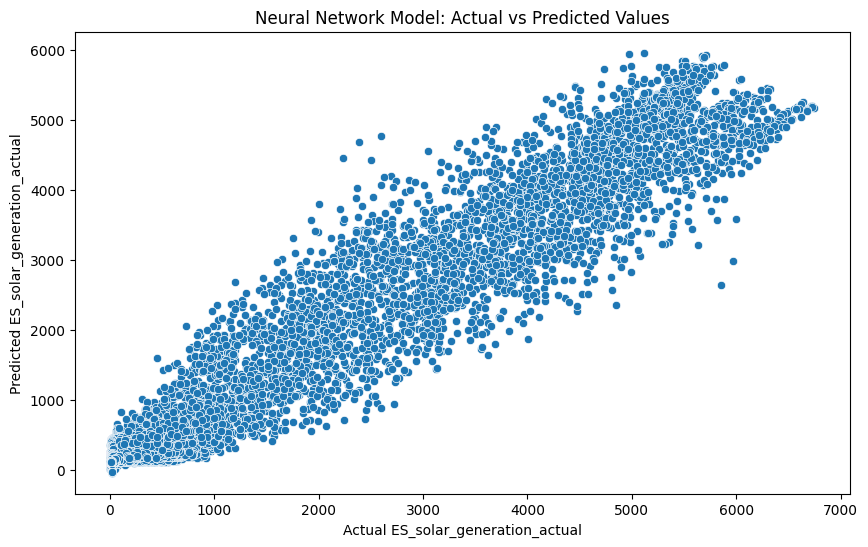

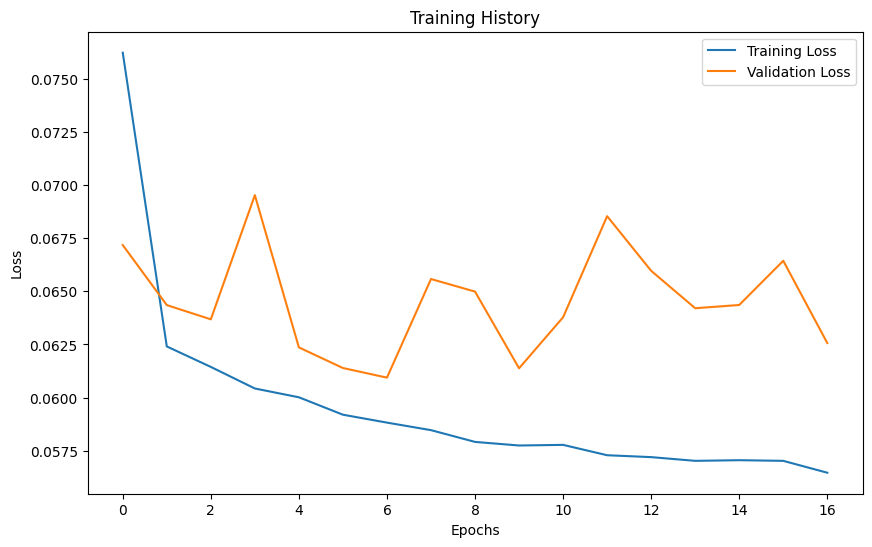

In [ ]:
# Visualization Block
mse_nn = mean_squared_error(y_test, y_pred_scaled_nn)
r_squared_nn = r2_score(y_test, y_pred_scaled_nn)

print(f'Neural Network Model:')
print(f'Mean Squared Error: {mse_nn}')
print(f'R-squared: {r_squared_nn}')

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale.flatten(), y=y_pred_nn.flatten())
plt.title('Neural Network Model: Actual vs Predicted Values')
plt.xlabel('Actual ES_solar_generation_actual')
plt.ylabel('Predicted ES_solar_generation_actual')
plt.show()

# Plot training history (loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Convert data to sequences for LSTM
def create_sequences(X, y, time_steps=1):
    X_sequences, y_sequences = [], []
    for i in range(len(X) - time_steps):
        X_sequences.append(X[i:(i + time_steps), :])
        y_sequences.append(y[i + time_steps])
    return np.array(X_sequences), np.array(y_sequences)

# Set the time steps for the LSTM
time_steps = 12 # You can adjust this value based on your specific requirements

# Create sequences
X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, time_steps)


In [ ]:
# Calculate the index to split the data
split_index = int(0.8 * len(X_scaled))

# Split the data into training and testing sets
X_train = X_sequences[:split_index]
X_test = X_sequences[split_index:]
y_train = y_sequences[:split_index]
y_test = y_sequences[split_index:]


In [ ]:
y_test

array([[-0.82899187],
       [-0.40310219],
       [ 0.3511496 ],
       ...,
       [-0.84284194],
       [-0.84284194],
       [-0.84284194]])

In [ ]:
from keras.layers import LSTM

# Define the model
model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(8, activation='relu'),  # Small Dense layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training Block with Early Stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Prediction Block
y_pred_scaled_lstm = model.predict(X_test)
y_pred_lstm = scaler_y.inverse_transform(y_pred_scaled_lstm)


Epoch 1/50
877/877 [==============================] - 8s 7ms/step - loss: 0.2333 - val_loss: 0.0561
Epoch 2/50
877/877 [==============================] - 7s 8ms/step - loss: 0.0495 - val_loss: 0.0571
Epoch 3/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0462 - val_loss: 0.0493
Epoch 4/50
877/877 [==============================] - 8s 9ms/step - loss: 0.0450 - val_loss: 0.0508
Epoch 5/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0434 - val_loss: 0.0494
Epoch 6/50
877/877 [==============================] - 7s 8ms/step - loss: 0.0426 - val_loss: 0.0475
Epoch 7/50
877/877 [==============================] - 7s 8ms/step - loss: 0.0418 - val_loss: 0.0498
Epoch 8/50
877/877 [==============================] - 7s 8ms/step - loss: 0.0411 - val_loss: 0.0509
Epoch 9/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0406 - val_loss: 0.0531
Epoch 10/50
877/877 [==============================] - 7s 8ms/step - loss: 0.0403 - val_loss: 0.0475

In [ ]:
from keras.layers import LSTM

# Define the model
model1 = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Output layer for regression
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training Block with Early Stopping
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Prediction Block
y_pred_scaled_lstm1 = model1.predict(X_test)
y_pred_lstm1 = scaler_y.inverse_transform(y_pred_scaled_lstm1)


Epoch 1/50
877/877 [==============================] - 10s 8ms/step - loss: 0.0951 - val_loss: 0.0541
Epoch 2/50
877/877 [==============================] - 8s 9ms/step - loss: 0.0490 - val_loss: 0.0511
Epoch 3/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0457 - val_loss: 0.0527
Epoch 4/50
877/877 [==============================] - 8s 9ms/step - loss: 0.0440 - val_loss: 0.0501
Epoch 5/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0427 - val_loss: 0.0516
Epoch 6/50
877/877 [==============================] - 8s 9ms/step - loss: 0.0422 - val_loss: 0.0564
Epoch 7/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0411 - val_loss: 0.0500
Epoch 8/50
877/877 [==============================] - 8s 9ms/step - loss: 0.0404 - val_loss: 0.0524
Epoch 9/50
877/877 [==============================] - 6s 7ms/step - loss: 0.0397 - val_loss: 0.0481
Epoch 10/50
877/877 [==============================] - 8s 9ms/step - loss: 0.0395 - val_loss: 0.049

Epoch 1/50
877/877 [==============================] - 17s 14ms/step - loss: 0.1221 - val_loss: 0.0595
Epoch 2/50
877/877 [==============================] - 11s 13ms/step - loss: 0.0570 - val_loss: 0.0529
Epoch 3/50
877/877 [==============================] - 12s 14ms/step - loss: 0.0537 - val_loss: 0.0655
Epoch 4/50
877/877 [==============================] - 12s 14ms/step - loss: 0.0523 - val_loss: 0.0531
Epoch 5/50
877/877 [==============================] - 13s 14ms/step - loss: 0.0512 - val_loss: 0.0502
Epoch 6/50
877/877 [==============================] - 12s 14ms/step - loss: 0.0508 - val_loss: 0.0527
Epoch 7/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0500 - val_loss: 0.0516
Epoch 8/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0498 - val_loss: 0.0523
Epoch 9/50
877/877 [==============================] - 12s 14ms/step - loss: 0.0493 - val_loss: 0.0503
Epoch 10/50
877/877 [==============================] - 11s 13ms/step - loss: 0.049

KeyboardInterrupt: 

Epoch 1/50
877/877 [==============================] - 17s 15ms/step - loss: 0.0632 - val_loss: 0.0563
Epoch 2/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0556 - val_loss: 0.0553
Epoch 3/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0530 - val_loss: 0.0506
Epoch 4/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0516 - val_loss: 0.0582
Epoch 5/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0512 - val_loss: 0.0496
Epoch 6/50
877/877 [==============================] - 13s 15ms/step - loss: 0.0500 - val_loss: 0.0503
Epoch 7/50
788/877 [=========================>....] - ETA: 1s - loss: 0.0499

KeyboardInterrupt: 

ValueError: Input 0 of layer "lstm_10" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)

LSTM Model:
Mean Squared Error: 0.07489593234368919
R-squared: 0.9390426413605916


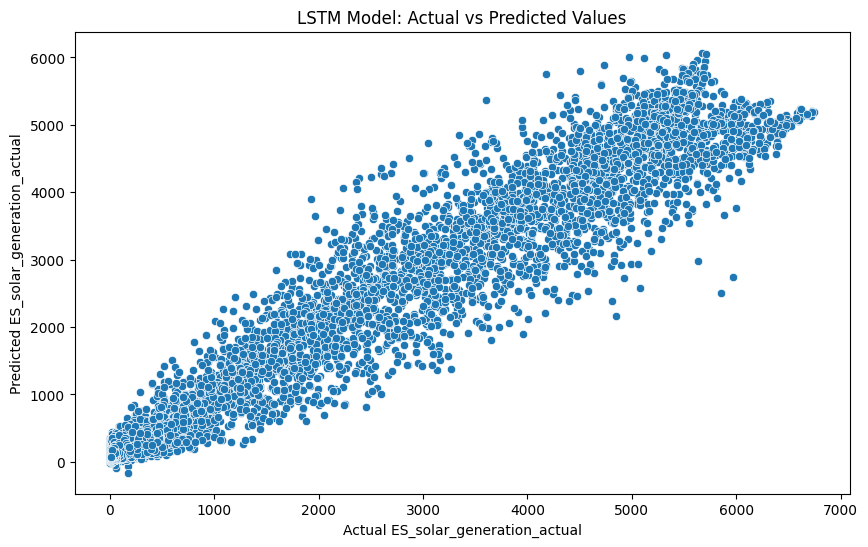

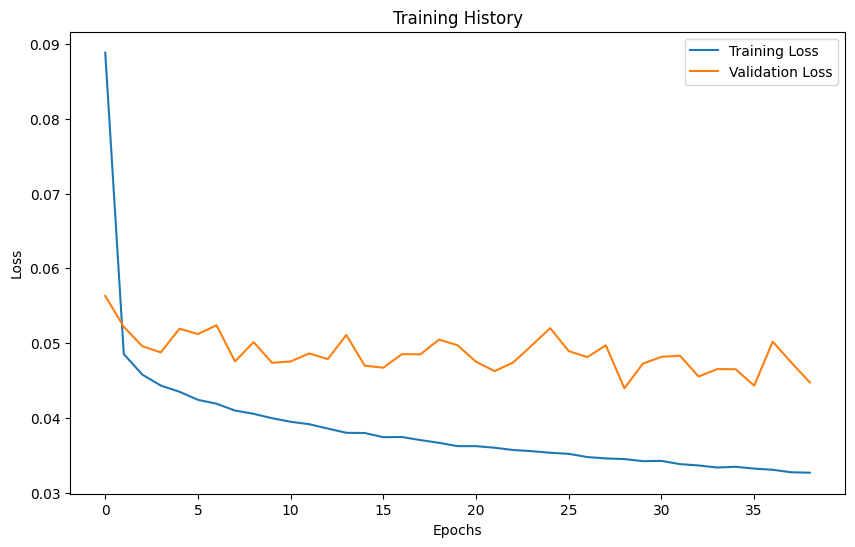

In [ ]:
# Visualization Block
mse_lstm = mean_squared_error(y_test, y_pred_scaled_lstm)
r_squared_lstm = r2_score(y_test, y_pred_scaled_lstm)
y_test_original_scale = scaler_y.inverse_transform(y_test)

print(f'LSTM Model:')
print(f'Mean Squared Error: {mse_lstm}')
print(f'R-squared: {r_squared_lstm}')

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original_scale.flatten(), y=y_pred_lstm.flatten())
plt.title('LSTM Model: Actual vs Predicted Values')
plt.xlabel('Actual ES_solar_generation_actual')
plt.ylabel('Predicted ES_solar_generation_actual')
plt.show()

# Plot training history (loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Convert predicted values to original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred_scaled_lstm)
# Apply inverse z-score transformation to y_test
y_test_original_scale = scaler_y.inverse_transform(y_test)


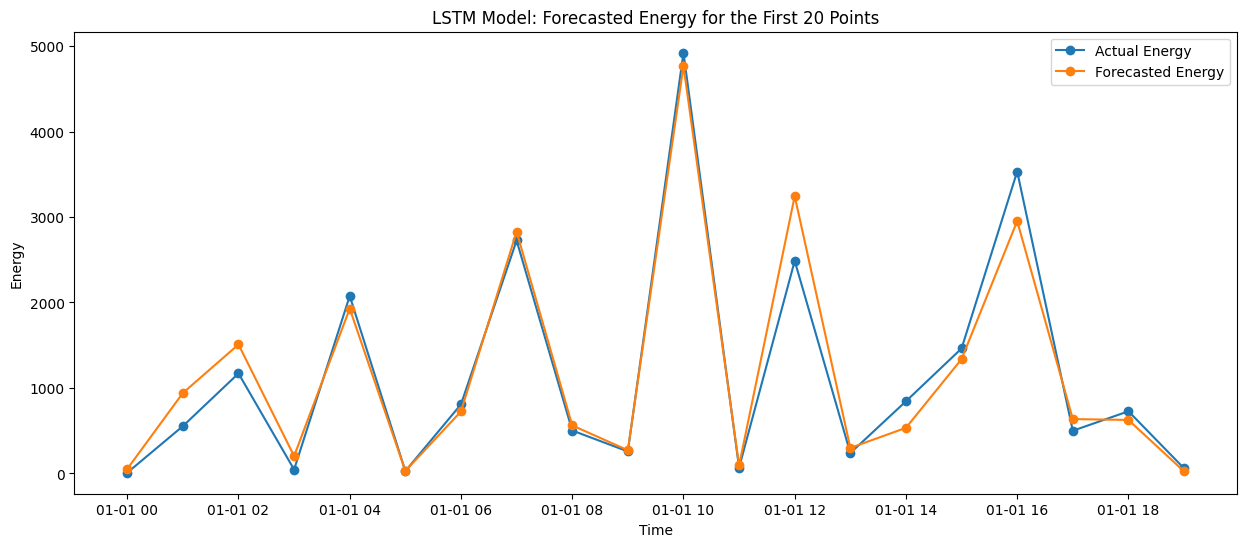

In [ ]:
# Select the first 20 points of data
selected_points = 20
y_test_selected_points = y_test_original_scale[:selected_points]
y_pred_selected_points = y_pred_original_scale[:selected_points]

# Create a time range for x-axis
time_range_selected_points = pd.date_range(start='2019-01-01', periods=len(y_test_selected_points), freq='H')

# Plot forecasted energy for the selected points
plt.figure(figsize=(15, 6))
plt.plot(time_range_selected_points, y_test_selected_points.flatten(), label='Actual Energy', marker='o')
plt.plot(time_range_selected_points, y_pred_selected_points.flatten(), label='Forecasted Energy', marker='o')
plt.title('LSTM Model: Forecasted Energy for the First 20 Points')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.show()


In [ ]:
import random

# Generate a random day within the year
random_day = random.randint(1, 364)

# Calculate the start and end indices based on the random day
selected_points_one_day_start = 25 * random_day
selected_points_one_day_end = 25 * (random_day + 1)

# Get the exact date for the random day
random_date = pd.to_datetime('2019-01-01') + pd.Timedelta(days=random_day - 1)

# Select the first 24 points of data (one day)
y_test_selected_one_day = y_test_original_scale[selected_points_one_day_start:selected_points_one_day_end]
y_pred_selected_one_day = y_pred_original_scale[selected_points_one_day_start:selected_points_one_day_end]

# Create a time range for x-axis
time_range_selected_one_day = pd.date_range(start=random_date, periods=len(y_test_selected_one_day), freq='H')


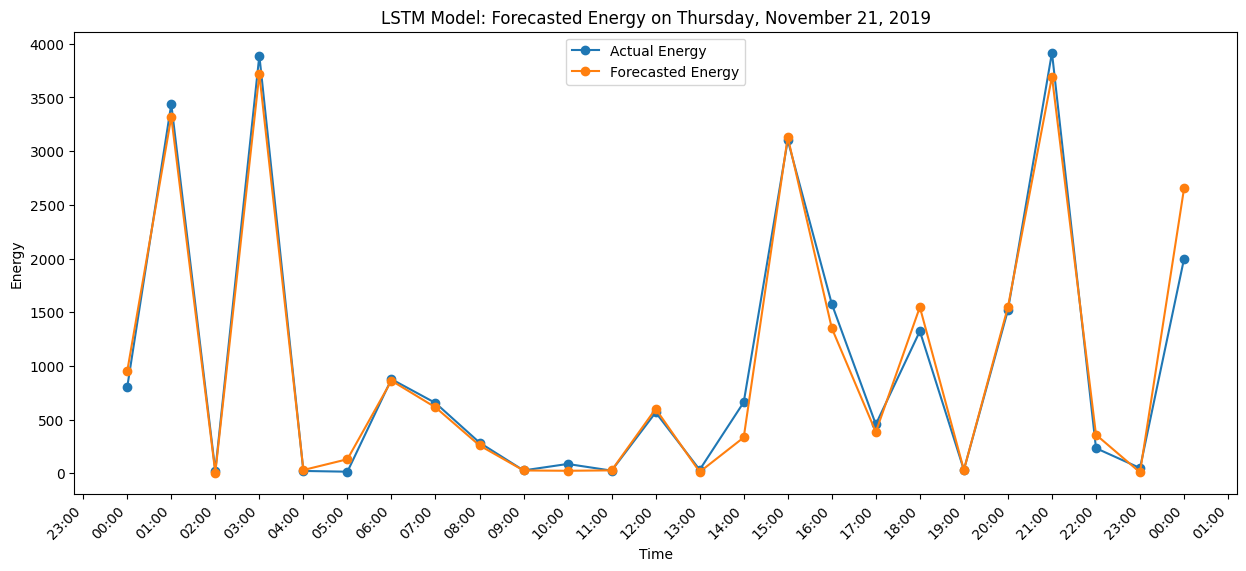

In [ ]:
# Plot forecasted energy for the selected points (one day) with the exact date and day
plt.figure(figsize=(15, 6))
plt.plot(time_range_selected_one_day, y_test_selected_one_day.flatten(), label='Actual Energy', marker='o')
plt.plot(time_range_selected_one_day, y_pred_selected_one_day.flatten(), label='Forecasted Energy', marker='o')
plt.title(f'LSTM Model: Forecasted Energy on {random_date.strftime("%A, %B %d, %Y")}')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every hour on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis labels as hours and minutes
plt.legend()
plt.show()


In [ ]:
len(y_test_original_scale)

8672

In [ ]:
len(y_pred_original_scale)

8672

In [ ]:
import pandas as pd

# Define the data
data = {
    "Model": ["Random Forest", "Random Forest", "XGBoost Model", "Neural Network", "Neural Network"],
    "Mean Squared Error": [0.06970479552006928, 0.06970479552006928, 0.06539524162725324, 0.06442171860733069, 0.06442171860733069],
    "R-squared": [0.9295227884916762, 0.9295227884916762, 0.933880097611435, 0.934864408479452, 0.934864408479452]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df


,Model,Mean Squared Error,R-squared
0,Random Forest,0.069705,0.929523
1,Random Forest,0.069705,0.929523
2,XGBoost Model,0.065395,0.933880
3,Neural Network,0.064422,0.934864
4,Neural Network,0.064422,0.934864


In [ ]:
import pandas as pd

# Define the data
data = {
    "Model": ["Random Forest", "XGBoost Model", "Neural Network", "LSTM Model", "Decision Tree Model"],
    "Mean Squared Error": [0.06970479552006928, 0.06539524162725324, 0.06442171860733069, 0.04471036304155368, 0.12206726796922127],
    "R-squared": [0.9295227884916762, 0.933880097611435, 0.934864408479452, 0.956212314647982, 0.8765800746028573]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by "Mean Squared Error"
df_sorted = df.sort_values(by="Mean Squared Error")

# Print the sorted DataFrame
df_sorted


,Model,Mean Squared Error,R-squared
3,LSTM Model,0.044710,0.956212
2,Neural Network,0.064422,0.934864
1,XGBoost Model,0.065395,0.933880
0,Random Forest,0.069705,0.929523
4,Decision Tree Model,0.122067,0.876580


In [ ]:
import pandas as pd

# Define the data
data = {
    "Model": ["Random Forest", "XGBoost Model", "Neural Network", "LSTM Model", "Decision Tree Model"],
    "Mean Squared Error": [0.06970479552006928, 0.06539524162725324, 0.06442171860733069, 0.04471036304155368, 0.12206726796922127],
    "R-squared": [0.9295227884916762, 0.933880097611435, 0.934864408479452, 0.956212314647982, 0.8765800746028573]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by "Mean Squared Error"
df_sorted = df.sort_values(by="Mean Squared Error").reset_index(drop=True)

# Print the sorted DataFrame
df_sorted


,Model,Mean Squared Error,R-squared
0,LSTM Model,0.044710,0.956212
1,Neural Network,0.064422,0.934864
2,XGBoost Model,0.065395,0.933880
3,Random Forest,0.069705,0.929523
4,Decision Tree Model,0.122067,0.876580


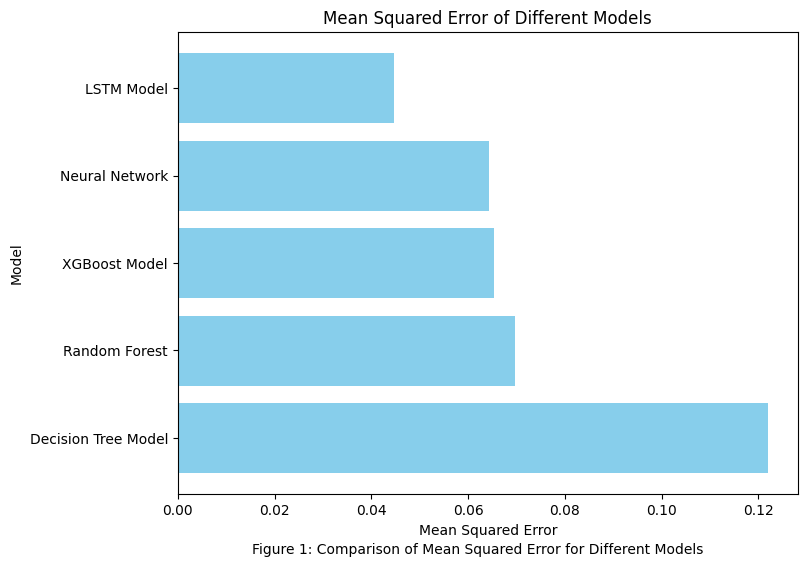

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by "Mean Squared Error"
df_sorted = df.sort_values(by="Mean Squared Error").reset_index(drop=True)

# Plot the data
plt.figure(figsize=(8, 6))
plt.barh(df_sorted["Model"], df_sorted["Mean Squared Error"], color='skyblue')
plt.xlabel('Mean Squared Error')
plt.ylabel('Model')
plt.title('Mean Squared Error of Different Models')
plt.gca().invert_yaxis()

# Add a caption
plt.figtext(0.5, 0.01, 'Figure 1: Comparison of Mean Squared Error for Different Models', ha='center', fontsize=10, wrap=True)

# Show the plot
plt.show()


In [ ]:
total_rows = 43824
test_percentage = 0.20

test_rows = int(total_rows * test_percentage)
print("Number of rows for testing:", test_rows)


Number of rows for testing: 8764


In [ ]:
total_rows = 43824
test_percentage = 0.20

test_rows = int(total_rows * test_percentage)
first_testing_row_number = total_rows - test_rows + 1

print("Row number of the first row in the testing dataset:", first_testing_row_number)


Row number of the first row in the testing dataset: 35061
